In [1]:
# imports
import market_status as ms
from IPython.display import display_html
import pandas as pd
import datetime as dt
import os

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

**Stuff to implement**
- Options status for major indices
- Distribution days for indices (based on the "How to Make Money in Stocks" book)
- ~~Add Nasdaq to indices overview (remove double stochastic, keep only VFI)~~
- Recent IPOs (use finviz screener) with basic stats (IPO date, industry)
- Crypto status (only the big ones compared to USD = BTC, ETH, další?)
- Add small cheatsheet what to look for with each notebook section

**Basic information** 
<br>
Market is open every weekday from 09:30 to 16:00 EST (15:30 to 22:00 CET)
<br>
Holidays (when market is closed)
<table>
<thead>
<tr>
<th>Date</th>
<th>Weekday</th>
<th>Note</th>
</tr>
</thead>
<tbody>
<tr>
<td>21/02/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>15/04/2022</td>
<td>Friday</td>
<td>-</td>
</tr>
<tr>
<td>30/05/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>20/06/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>04/07/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>05/09/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>24/11/2022</td>
<td>Thursday</td>
<td>Closes at 13:00</td>
</tr>
<tr>
<td>26/12/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
</tbody>
</table>


## **World Markets**

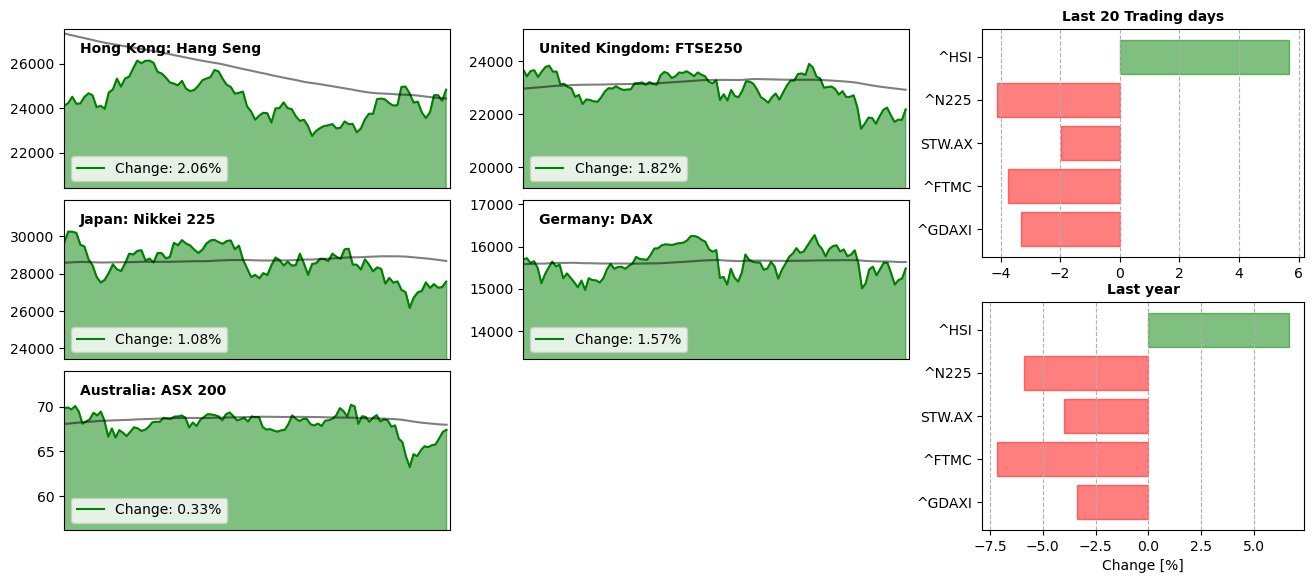

In [2]:
ms.worldmarkets()

***
## **US markets**
Spy = ETF following S&P500, IWM = ETF following Russell 2000
<br>
Follow the price action. How is the price and volume evolving? Any clear support or resistance soon? How is the new highs/new lows indicator acting compared to the overall market?

Last update done: 10-02-2022 at 09:07:36


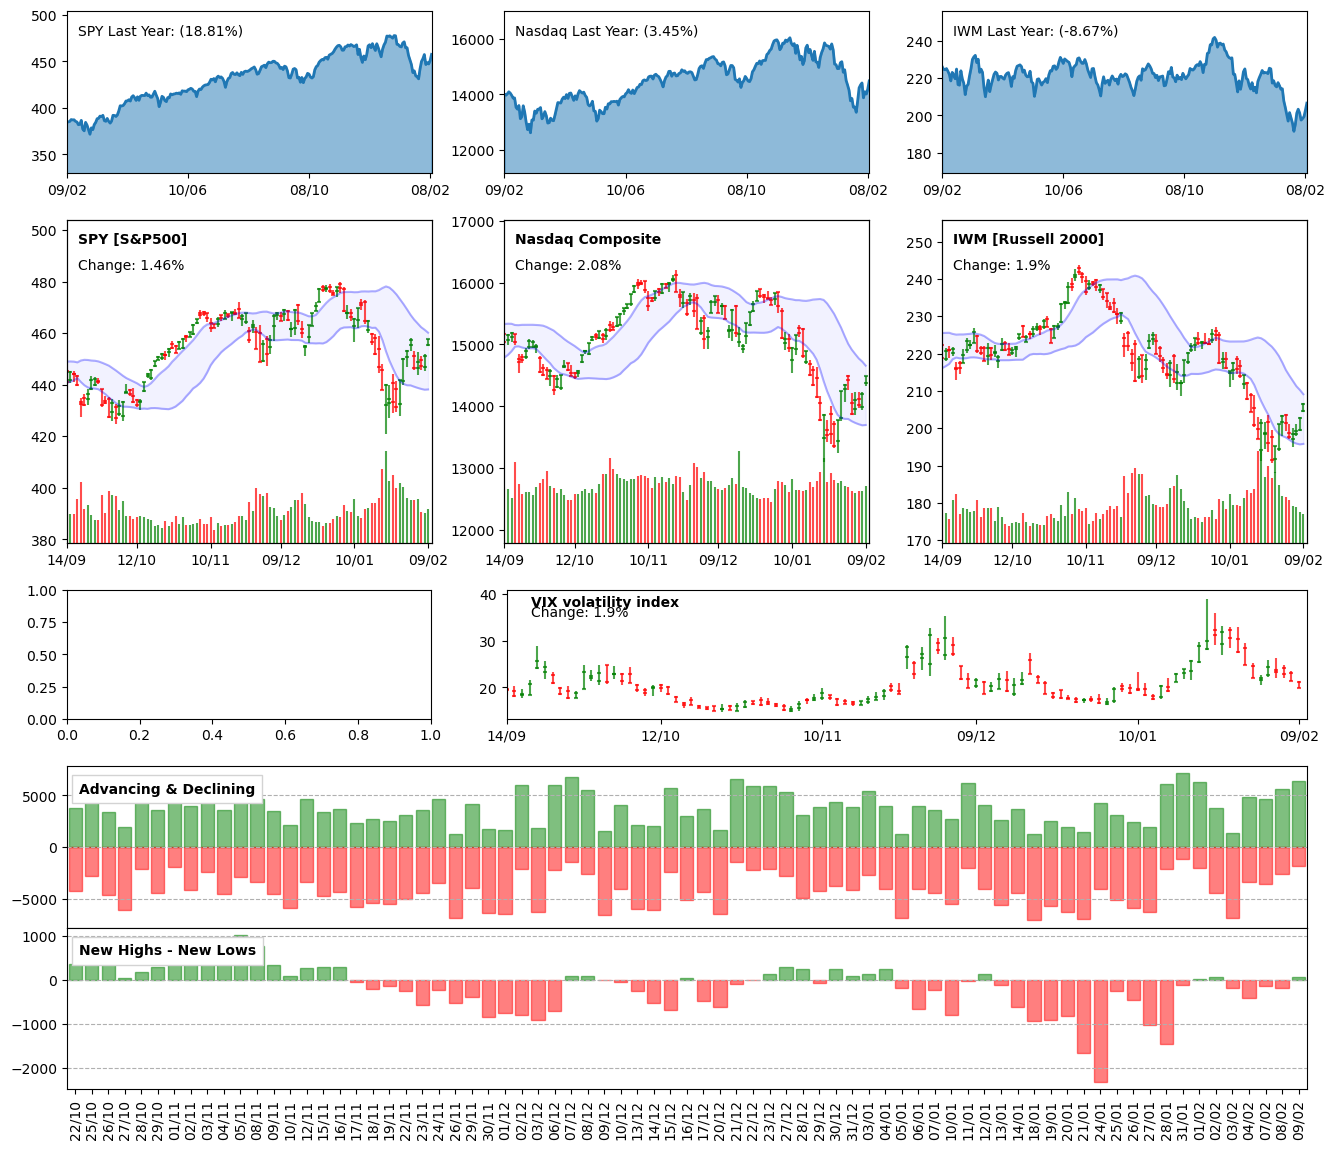

In [3]:
ms.usmarkets()

***
## **Sectors**
Explanations:
- Consumer Discretionary (cyclical) = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples (non-cyclical, defensive) = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

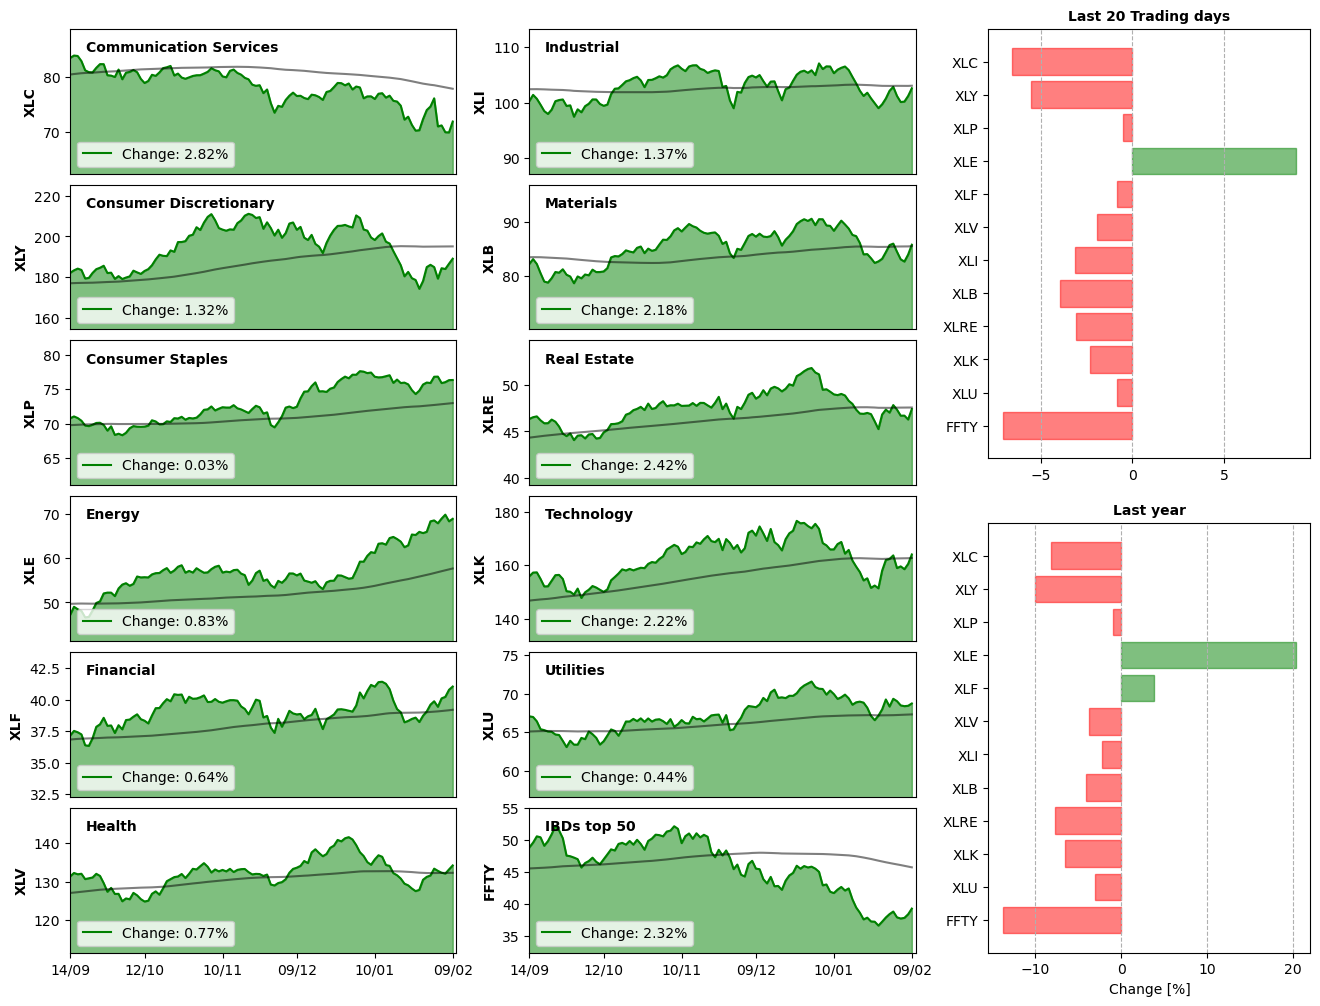

In [4]:
ms.sectors()

### Industries
Following tables are 20 best performing industries in last month followed by 10 worst performing indistries. Both tables are sorted by descending performance over last month.
<br>
Any industry shows relative strength compared to rest of the market? This could be potential winner for next cycle.

In [5]:
ind = ms.industries(sf=True, rank=True)
display_html(ind.prettify(ind.table.iloc[:20,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Coking Coal,11.29,18.23,60.55,103.70,1.08,2.49,0
Department Stores,5.99,16.01,8.88,36.59,0.63,2.22,2
Marine Shipping,3.52,13.62,24.14,61.94,1.34,2.25,0
Oil & Gas Integrated,1.28,13.41,30.86,47.35,1.12,0.62,-2
Aluminum,19.85,12.84,19.06,100.95,1.28,4.39,3
Oil & Gas Equipment & Services,0.92,11.64,28.81,32.81,0.89,1.58,-1
Thermal Coal,5.11,10.20,32.64,118.85,1.18,2.44,2
Oil & Gas E&P,-1.23,10.04,50.46,83.46,0.83,1.75,2
Other Industrial Metals & Mining,5.77,10.00,-9.34,-0.20,1.07,0.30,-3
Resorts & Casinos,8.21,9.91,3.46,-5.26,1.01,3.20,10


In [6]:
display_html(ind.prettify(ind.table.iloc[-10:,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Entertainment,1.07,-7.03,-17.02,-17.11,1.15,2.47,-2
Utilities - Regulated Water,-2.78,-7.04,-7.53,-2.05,0.77,-0.11,-11
Biotechnology,1.73,-7.74,-28.56,-35.25,0.81,3.82,-3
REIT - Office,-1.15,-7.96,-5.37,4.95,1.08,1.92,-2
Auto Parts,0.48,-7.98,-9.02,-10.62,0.87,1.93,-1
Grocery Stores,2.86,-8.01,-3.25,13.02,0.59,0.30,-29
Business Equipment & Supplies,-4.02,-8.10,-12.40,7.41,1.14,1.79,1
Mortgage Finance,2.75,-8.26,-20.69,-31.17,0.72,0.82,-7
Building Products & Equipment,0.64,-8.55,-5.52,14.60,1.02,2.87,-4
Auto Manufacturers,1.54,-10.45,13.63,5.86,0.79,1.95,-3


***
## **Futures**
Selected commodities futures. 
Will add also column for a relative year performance, but currently scrapper has a problem that the ethanol returns Null value.

In [7]:
futures = ms.futures()
data_futures = futures.returnfutures()
display_html(futures.prettify(data_futures.iloc[:12,:])._repr_html_()+"\xa0\xa0\xa0"+futures.prettify(data_futures.iloc[12:,:])._repr_html_(), raw=True)

,Day [%],Week [%],Month [%],Quarter [%]
Natural Gas,-0.42,-12.69,-2.13,-18.20
Crude Oil WTI,0.19,-2.69,14.83,10.44
Crude Oil Brent,0.11,-1.74,13.33,10.90
Ethanol,2.78,2.78,-10.48,-4.72
Palladium,-0.14,-0.38,19.53,11.92
Copper,0.64,3.22,6.43,7.15
Platinum,-0.30,0.99,10.79,-3.96
Silver,0.12,3.98,4.04,-5.66
Gold,-0.07,1.53,2.03,-0.70
Lumber,3.88,12.62,-1.87,88.24


***
## **Crypto & Forex**

In [8]:
# outptut table with cryptos and their preformance in last day/week/month

***
## **Finviz screeners**
Following tables are results from pre-defined finviz screeners
<br><br>
**New high Breakouts** - [[Link]](https://finviz.com/screener.ashx?v=211&s=ta_newhigh&f=ind_stocksonly,sh_avgvol_o100,sh_float_o5,sh_relvol_o1)
<br>
Stocks with new 52 week highs, with float over 5M shares, average volume 100k and relative volume over 1. 

In [9]:
screeners = ms.screeners()
nh = screeners.newhighs()
screeners.prettify(nh)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
ECOL,CPSS,TIMB,MIRM,OMC,ATKR,TU,IPG,NLOK,CBT,MDRX,ZETA,VIRT,BG,UTI
CME,LAUR,ENVA,VIV,SF,TGH,LPLA,HSY,MCK,DB,MOS,ABC,BP,ADM,DAC
EXPE,SBLK,BMRN,AA,BDX,H,WRB,CSGS,EQH,TTE,TD,TECK,UBS,NXST,MIDD
NEX,BAX,AMR,CFR,WY,CPRI,AXP,CTVA,PBF,MS,BCC,WES,ENLC,STRL,PFG
FUN,ATO,,,,,,,,,,,,,


**50 day high with fundamentals** - [[Link]](https://finviz.com/screener.ashx?v=211&f=fa_debteq_u1,fa_eps5years_o10,fa_sales5years_o10,ind_stocksonly,sh_avgvol_o100,sh_float_o5,sh_relvol_o1,ta_highlow50d_nh)
<br>
Stocks which have 50 day highs with higher relative volume and basic fundamental filtration (dept/equity <1, sales and EPS growth in last 5 years larger than 10%)

In [10]:
fd = screeners.fiftyday()
screeners.prettify(fd)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
JKHY,FOXA,SHIP,SF,CHGG,MCFT,STRL,ATO,,,,,,,


In [11]:
# save the screener results into xlsx
with pd.ExcelWriter("Data/Screeners/NH"+str(dt.date.today().strftime("%Y-%m"))+".xlsx", mode="a") as writer:
    nh.to_excel(writer, sheet_name=dt.date.today().strftime("%Y-%m-%d"))
with pd.ExcelWriter("Data/Screeners/FD"+str(dt.date.today().strftime("%Y-%m"))+".xlsx", mode="a") as writer:
    fd.to_excel(writer, sheet_name=dt.date.today().strftime("%Y-%m-%d"))

***
## **New IPOs**
New companies on the market during the last month, look for interesting price changes or so

---
**Run check:** Checks if the code run well <br>
**Saving:** Following code is for saving the notebook into the HTML file for easy reading and sharing. Need to be done manually, when notebook finishes running!


In [12]:
# run check

In [15]:
# save
os.system("jupyter nbconvert --to html --template classic market_status.ipynb")

0

---
## **Mini Wiki**
Following section is written down trading rules, strategies, and other things which needs to be reminded occasionally

**Trading rules**

**Good resources**
1. [Market momentum](https://www.barchart.com/stocks/momentum) - Watch for the number of stocks which are declining and advancing and overall number of new highs/new lows
2. [SPY p/c ratio](https://www.barchart.com/etfs-funds/quotes/SPY/put-call-ratios) - P/C ratio >1 = bearish
**Setup images**

**Others**